# **BANK MARKETING CAMPAIGN**

## Business Problem Understanding

#### **Context:**

Sebuah bank memiliki produk deposito berjangka (*term deposit*). *Term deposits* adalah sebuah produk bank yang berfungsi untuk menaruh uang dan dapat ditarik dalam jangka waktu yang ditetapkan. Tim *marketing* dari *term deposit* ini melakukan request kepada tim *data science* untuk mengetahui apakah *campaign marketing* yang dibuat oleh tim *marketing* menghasilkan nasabah yang akhirnya membeli *term deposit*. Pihak bank ingin dapat memprediksi nasabah yang akan membeli produk *term deposits* atau tidak. Sehingga, pihak bank dapat melakukan efisiensi biaya untuk melakukan *campaign*. Didapatkan data umur, pekerjaan, *balance*(saldo), *housing* dan *loan*(peminjaman) dari pihak customer.

Target :

**1** : Deposit

**0** : Not Deposit

#### **Problem Statement:**

Proses *campaign* yang dilakukan kepada banyak orang secara *random* membutuhkan waktu dan dana yang banyak. Sehingga, pihak bank menyia-nyiakan waktu dan dana untuk melakukan campaign pada orang yang tidak tepat. Tim *marketing* dapat melakukan *campaign* untuk orang-orang yang ingin membeli  *term deposit* ini. Pihak bank lebih menghindari orang yang terprediksi membeli *term deposit*, namun akhirnya tidak membeli produk *term deposit*.


#### **Goals:**

Berdasarkan permasalahan yang sudah dijabarkan, pihak bank ingin dapat memprediksi apakah *campaign* mereka akan sampai di calon nasabah yang memerlukan deposito berjangka ini. Sehingga, budget yang diberikan untuk mereka dapat digunakan secara efektif.

Bank ini juga ingin mencari kriteria calon nasabah mereka, yang nantinya mereka akan memasukkan uang mereka dalam bentuk deposito berjangka di bank ini. Sehingga, *campaign marketing* mereka akan lebih terencana.

#### **Analytic Approach:**

Pertama, kita akan menganalisa kriteria nasabah seperti apa yang sudah membeli deposito berjangka ini dengan menggunakan data yang sudah dimiliki. Kemudian, kita akan membuat model klasifikasi untuk membantu tim *marketing* deposito berjangka ini untuk memprediksi apakah calon nasabah tersebut akan membeli  deposito berjangka atau tidak.

#### **Metric Evaluation:**

Type 1 error : False Positive

Konsekuensi : biaya marketing, waktu, dan tenaga yang sia-sia

Berdasarkan tiap konsekuensinya, maka yang akan berusaha kita lakukan adalah dengan membuat sebuah model yang nantinya dapat mengurangi biaya, waktu dan tenaga dalam melakukan marketing. Kami berharap model kami dapat memprediksi kelas positif dengan benar. Pihak bank merasa bahwa nasabah yang punya ciri-ciri akan membeli *term deposits* dan akhirnya tidak membeli produk ini akan menimbulkan kerugian dibanding dengan nasabah yang punya ciri-ciri tidak akan melakukan deposit dan akhirnya melakukan deposit. Dan *metrics* utama yang akan digunakan adalah *precision*.

## Data Understanding

### Dataset Information

Dataset ini menampiilkan informasi terkait dengan data diri customer, dan informasi terkait dengan *marketing campaign*. Dataset ini terdiri atas 11 kolom yaitu :

- age : umur nasabah
- job : pekerjaan nasabah
- balance : saldo nasabah
- housing : menunjukkan adanya cicilan rumah / KPR yang ditanggung oleh nasabah
- loan : menunjukkan adanya peminjaman yang dilakukan oleh nasabah
- contact : metode komunikasi saat melakukan *campaign*
- month : bulan terakhir nasabah di-*contact* pada tahun tsb. 
- campaign : jumlah *contact* yang dilakukan kepada nasabah selama *campaign*
- pdays : selisih jumlah hari nasabah di-*contact* dari *campaign* sebelumnya
- poutcome : hasil dari *marketing campaign* sebelumnya
- deposit : menunjukkan apakah nasabah melakukan deposit atau tidak

In [117]:
## Import Basic Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Set max columns
pd.set_option('display.max_columns', None)

In [118]:
bank = pd.read_csv('data_bank_marketing_campaign.csv')
bank

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [119]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


Data ini terdiri atas 7813 baris dengan 11 kolom. Terdapat 7 kolom kategorikal dan 4 kolom numerikal.

### Data Cleaning

In [120]:
# Menampilkan data unik di tiap kolom
pd.set_option('display.max_colwidth', -1)

listItem = []
for col in bank.columns :
    listItem.append( [col, bank[col].nunique(), bank[col].unique()])

tabeldesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabeldesc

,Column Name,Number of Unique,Unique Sample
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,4,"[unknown, other, failure, success]"


In [121]:
bank['job'].unique()

array(['admin.', 'self-employed', 'services', 'housemaid', 'technician',
       'management', 'student', 'blue-collar', 'entrepreneur', 'retired',
       'unemployed', 'unknown'], dtype=object)

In [122]:
print(bank['job'].value_counts())
print(bank['contact'].value_counts())
print(bank['poutcome'].value_counts())

management       1792
blue-collar      1346
technician       1291
admin.           936 
services         658 
retired          540 
self-employed    280 
unemployed       249 
student          247 
entrepreneur     236 
housemaid        184 
unknown          54  
Name: job, dtype: int64
cellular     5628
unknown      1639
telephone    546 
Name: contact, dtype: int64
unknown    5819
failure    848 
success    761 
other      385 
Name: poutcome, dtype: int64


Dapat dilihat bahwa tidak ada *null value* pada data ini. Namun jika melihat pada kolom `Unique Sample`, terdapat beberapa kolom yang masih mengandung 'unknown' yaitu kolom `job`, dan `poutcome` yang dianggap sebagai *missing values*. Nilai *unknown* pada kolom `job` akan diisi dengan nilai modus dari setiap kolom tersebut. Dan untuk kolom `poutcome`, baris yang mengandung 'unknown' akan diisi dengan other. Pada kolom `pdays` yang merupakan selisih hari antar *campaign* setiap nasabah yang memiliki nilai -1 (minus). Dengan info *database* yang digunakan kolom `pdays` seharusnya memiliki nilai positif. Jadi nilai -1 pada kolom ini akan diganti dengan 0. Dengan asumsi nilai kolom -1 pada `pdays` menunjukkan bahwa setelah dilakukan campaign kepada nasabah, nasabah tersebut langsung memutuskan apakah ia akan membeli produk ini atau tidak.

In [123]:
# Mengecek nilai job 'unknown' dengan nilai modusnya
print(bank['job'].mode())
bank['job'] = bank['job'].replace('unknown', bank['job'].mode()[0])

0    management
Name: job, dtype: object


In [124]:
# Menghitung kembali jumlah values pada kolom 'job'
bank['job'].value_counts()

management       1846
blue-collar      1346
technician       1291
admin.           936 
services         658 
retired          540 
self-employed    280 
unemployed       249 
student          247 
entrepreneur     236 
housemaid        184 
Name: job, dtype: int64

In [125]:
# Mengganti nilai 'unknown' pada kolom contact dengan nilai modus
print(bank['contact'].mode())
bank['contact'] = bank['contact'].replace('unknown', bank['contact'].mode()[0])

0    cellular
Name: contact, dtype: object


In [126]:
# Menghitung kembali jumlah values pada kolom 'contact'
bank['contact'].value_counts()

cellular     7267
telephone    546 
Name: contact, dtype: int64

In [127]:
# Mengganti nilai 'unknown' pada kolom contact dengan 'other'
bank['poutcome'] = bank['poutcome'].replace('unknown', 'other')

In [128]:
# Menghitung kembali jumlah values pada kolom 'contact'
bank['poutcome'].value_counts()

other      6204
failure    848 
success    761 
Name: poutcome, dtype: int64

In [129]:
# Mengganti nilai -1 pada kolom 'pdays' menjadi 0
bank['pdays'] = bank['pdays'].replace(-1, 0)

In [130]:
# Menghitung kembali jumlah values pada kolom 'pdays'
bank['pdays'].value_counts()

0      5817
92     80  
91     62  
182    61  
181    56  
       ..  
375    1   
320    1   
373    1   
24     1   
155    1   
Name: pdays, Length: 422, dtype: int64

In [131]:
# Update data unik di setiap kolom
pd.set_option('display.max_colwidth', -1)

listItem = []
for col in bank.columns :
    listItem.append( [col, bank[col].nunique(), bank[col].unique()])

tabeldescUpdate = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabeldescUpdate

,Column Name,Number of Unique,Unique Sample
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,11,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed]"
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,2,"[cellular, telephone]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,422,"[0, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,3,"[other, failure, success]"


Sebelum diproses lebih lanjut, perlu dilihat juga persebaran data dari setiap kolom numerikal.

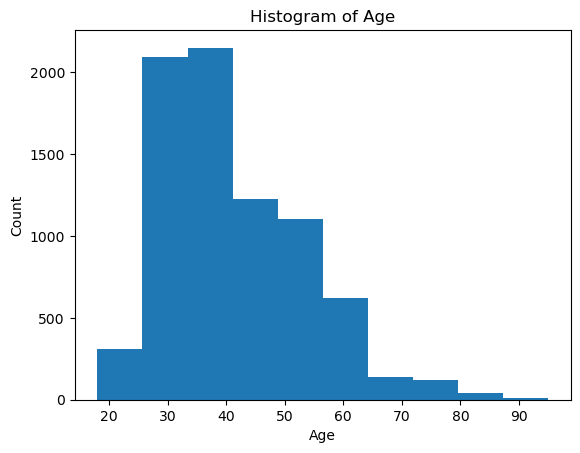

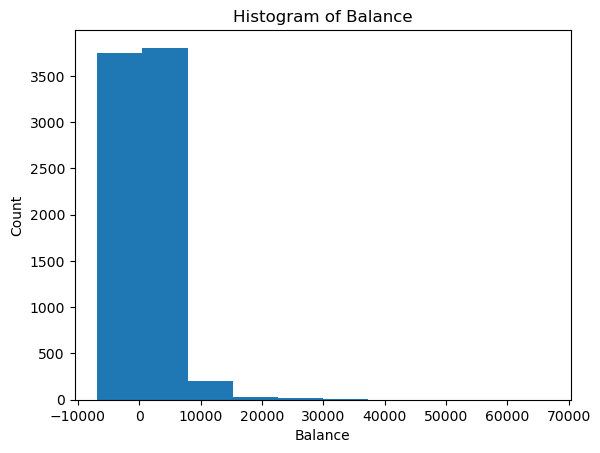

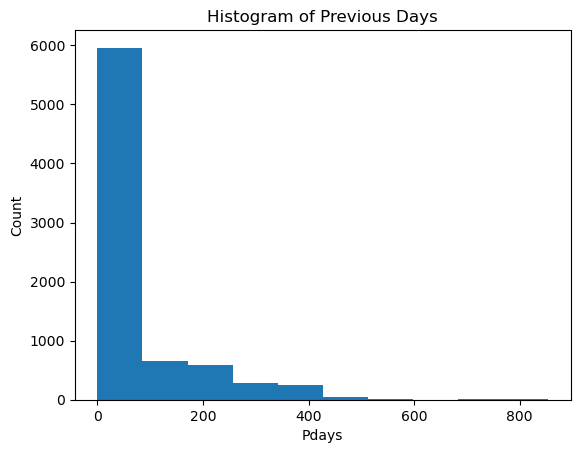

In [132]:
# Plot histogram for 'tenure'
plt.hist(bank['age'], bins=10)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plot histogram for 'monthly charges'
plt.hist(bank['balance'], bins=10)
plt.title('Histogram of Balance')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

# Plot histogram for 'monthly charges'
plt.hist(bank['pdays'], bins=10)
plt.title('Histogram of Previous Days')
plt.xlabel('Pdays')
plt.ylabel('Count')
plt.show()

Dengan melakukan plotting dengan menggunakan histogram, maka dapat dilihat bahwa data yang ada pada kolom `age`, `balance`, dan `pdays` memiliki distribusi yang tidak normal.

## Data Preparation

In [133]:
## Import Library untuk Pre-Modeling
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline

Terdapat 7 kolom pada dataset ini yang bersifat katergorikal yaitu kolom `job`, `housing`, `loan`, `contact`, `month`, dan `poutcome`. Saya akan melakukan *encoding* untuk kolom-kolom kategorikal ini. 

1. ***One Hot Encoding (OHE)*** : proses encoding ini akan diaplikasikan untuk kolom `housing`, `loan`, `contact`, dan `poutcome`, karena kolom ini hanya memiliki 2-3 *unique values*. Dimana kolom `housing` dan `loan` adalah kolom yang menunjukkan apakah nasabah mempunyai rumah atau pinjaman. Kolom contact adalah kolom yang berisi metode *campaign* yang dilakukan oleh pihak bank. dan kolom poutcome adalah kolom yang menunjukkan apa hasil dari *campaign* sebelumnya.

2. ***Binary Encoding*** : proses encoding ini akan diaplikasikan untuk kolom `job`, karena kolom ini memiliki 11 unique values yang merupakan jenis pekerjaan dari setiap nasabah.

3. ***Ordinal Encoding*** : proses encoding ini akan diaplikasikan untuk kolom `month`, karena kolom month ini adalah kolom yang menunjukkan kapan terakhir nasabah dicontact untuk keperluan *campaign*

In [134]:
ordinal_map = [
    {'col' : 'month',
    'mapping': {None : 0, 'jan' : 1, 'feb' :2, 'mar' :3, 'apr' :4, 'may' :5, 'jun' :6,
               'jul' :7, 'aug' :8, 'sep' :9, 'oct' :10, 'nov' :11, 'dec' :12}}
]

In [135]:
transformer = ColumnTransformer([('scale', MinMaxScaler(), ['age', 'balance', 'pdays']),
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['housing', 'loan', 'contact', 'poutcome']),
                                 ('binary encoder',ce.BinaryEncoder(), ['job']),
                                 ('ordinal_ecoding', ce.OrdinalEncoder(mapping=ordinal_map), ['month'])
                                ], remainder = 'passthrough')

In [136]:
# Menggunakan np.where untuk mengubah kolom 'deposit' menjadi 1 dan 0
bank['deposit'] = np.where(bank['deposit'] == 'yes', 1, 0)
bank

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,0,other,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,0,other,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,0,other,0
4,36,housemaid,205,yes,no,telephone,nov,4,0,other,0
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,0,other,1
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1
7810,36,management,179,no,no,cellular,aug,8,0,other,0
7811,31,admin.,54,yes,no,cellular,nov,1,0,other,0


#### Train Test Split

Sebelum melakukan *modeling*, data perlu diset menjadi data training dan data test.

In [137]:
# Import Library
from sklearn.model_selection import train_test_split

In [138]:
# Define variable x dan y
x = bank.drop('deposit', axis=1)
y = bank['deposit']

In [139]:
# Melakukan train test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, stratify=y, test_size=0.2, random_state=2023)

#### Modeling

Setelah melakukan scaling, hal berikutnya yang harus dilakukan adalah memasukkan data hasil split train dan test data ke dalam berbagai macam model.

In [140]:
# Import Library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, precision_score
from sklearn.preprocessing import MinMaxScaler

In [141]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=2023)
rf = RandomForestClassifier(random_state=2023)
xgb = XGBClassifier(random_state=2023)
svm = SVC()

In [142]:
# Scaling data dengan menggunakan MinMaxScaler
scaler = MinMaxScaler()

# Models yang akan diuji nilai precisionnya
models = [logreg, knn, dt, rf, svm, xgb]

score_precision = []
nilai_mean_precision = []
nilai_std_precision = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    skfold = StratifiedKFold()

    estimator = Pipeline([
    ('preprocessor', transformer),
    ('model', i)
    ])

    # Precision Score
    model_cv_precision = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=skfold, 
        scoring='precision'
        )

    print(model_cv_precision, i)

    score_precision.append(model_cv_precision)
    nilai_mean_precision.append(model_cv_precision.mean())
    nilai_std_precision.append(model_cv_precision.std())

dfPrecision = pd.DataFrame({'Model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVClassifier', 'XGBoost'],
             'Nilai Rata-Rata Precision Score':nilai_mean_precision}).set_index('Model').sort_values(by='Nilai Rata-Rata Precision Score', ascending=False)
dfPrecision

[0.67783985 0.63475177 0.7030303  0.66356877 0.66731898] LogisticRegression()
[0.66216216 0.63853211 0.66202783 0.64140481 0.62851406] KNeighborsClassifier()
[0.57350565 0.61780105 0.57903494 0.590625   0.60810811] DecisionTreeClassifier(random_state=2023)
[0.70919325 0.71701721 0.71314741 0.67992424 0.69168357] RandomForestClassifier(random_state=2023)
[0.65867159 0.62786596 0.69498069 0.63028169 0.65607477] SVC()
[0.71656687 0.73387097 0.70517928 0.67735849 0.69105691] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_d

,Nilai Rata-Rata Precision Score
Model,
XGBoost,0.704807
Random Forest,0.702193
Logistic Regression,0.669302
SVClassifier,0.653575
KNN,0.646528
Decision Tree,0.593815


Berdasarkan *looping* dari setiap model dengan *metrics precision*, maka model yang memiliki nilai rata-rata *precision* yang paling tinggi adalah XGBoost. XGBoost adalah implementasi dari *gradient boosting*. *Gradient boosting* bekerja dengan cara membuat kombinasi beberapa *model/learner* yang lemah menjadi model tunggal yang dapat membuat prediksi dengan akurat. 

Ide dibalik *gradient boosting* adalah dengan melatih beberapa model yang simpel, seperti *decision tree*, dari *residual error* model sebelumnya. Residual error ini adalah selisih dari nilai target aktual dengan prediksinya yang dibuat dengan model sebelumnya. Model yang baru akan dilatih agar cocok dengan *residual error* ini dan akhirnya prediksi dari seluruh model dikombinasikan untuk membuat prediksi akhir.

#### Hyperparameter Tuning

Setelah mendapatkan model yang punya nilai metrics yang diinginkan, yang perlu dilakukan berikutnya yaitu melakukan *hyperparameter tuning* dengan mencari parameter optimal untuk model yang sudah dipilih.

In [143]:
estimator = Pipeline([
    ('preprocessor', transformer),
    ('model', xgb)
    ])

In [144]:
# Hyperparameter Tuning dengan GridsearchCV

hyperparam_space = {
    'model__max_leaves': [2, 5, 7, 9, 20, 50, 100],
    'model__max_depth' : [2, 5, 6, 7, 9, 10, 50, 100],
    'model__n_estimators': [5, 10, 20, 50, 70, 90, 100],
}

skfold = StratifiedKFold(n_splits = 5)
xgb = XGBClassifier(random_state = 2023)
grid_search = GridSearchCV(
    estimator, 
    param_grid = hyperparam_space,
    cv = skfold, 
    scoring = 'precision', 
    n_jobs = -1 
)

grid_search.fit(xtrain, ytrain)

print('best score',grid_search.best_score_)
print('best param',grid_search.best_params_)

best score 0.7697776004754525
best param {'model__max_depth': 6, 'model__max_leaves': 2, 'model__n_estimators': 10}


In [145]:
# Masukkan semua parameter terbaik ke dalam estimator
estimator = Pipeline([
    ('preprocessor', transformer),
    ('model', XGBClassifier(max_depth=6, max_leaves=2, n_estimators=10))
    ])

In [146]:
# Fit estimator ke data train
estimator.fit(xtrain, ytrain)
ypred = estimator.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75       816
           1       0.78      0.53      0.63       747

    accuracy                           0.70      1563
   macro avg       0.72      0.70      0.69      1563
weighted avg       0.72      0.70      0.69      1563



In [147]:
# Final Model
estimator = Pipeline([
    ('preprocessor', transformer),
    ('model', XGBClassifier(max_depth=6, max_leaves=2, n_estimators=10))
    ])

print('Classification Report Tuned XGBoost : \n', classification_report(ytest, ypred))

Classification Report Tuned XGBoost : 
               precision    recall  f1-score   support

           0       0.67      0.86      0.75       816
           1       0.78      0.53      0.63       747

    accuracy                           0.70      1563
   macro avg       0.72      0.70      0.69      1563
weighted avg       0.72      0.70      0.69      1563



Setelah tuning, didapatkan bahwa nilai *precision* naik dari 70.4% menjadi 78%. *Parameter* yang sudah dicek dengan menggunakan GridSearchCV menghasilkan model **XGBClassifier** dengan **max_depth** = 6, **max_leaves** = 2, dan **n_estimators** = 10. Model ini ditetapkan menjadi model final yang sudah siap di *deploy* untuk digunakan oleh pihak bank.

## Summary & Recommendation

### Summary
Berdasarkan pada nilai recallnya, maka dapat dikatakan model kita dapat menyaring 86% nasabah yang tidak tertarik dengan *term deposit* yang tidak perlu di-*approach* dan 53% orang yang tertarik dengan *term deposit* dari seluruh nasabah bank (berdasarkan nilai recallnya).

Dengan melihat nilai *precision*-nya maka dapat disimpulkan bahwa model kita dapat memprediksi secara tepat 78% nasabah yang membeli *term deposit* dan 67% lebih tepat dalam menentukan nasabah yang tidak membeli *term deposit*. Jadi perusahaan ingin untuk mengoptimalkan nilai *precision* ini supaya dapat membedakan nasabah yang memiliki ciri-ciri ingin membeli *term deposit* dan akhirnya membeli *term deposit* (True Positive). Dan juga menghindari nasabah yang memiliki ciri-ciri yang menunjukkan ketidaktertarikan terhadap *term deposit* namun akhirnya tidak membeli *term deposit*. Sehingga, pihak bank dapat melakukan efisiensi *budget* dan melakukan campaign ke orang yang tepat.

### Recommendation

Hal-hal yang bisa dilakukan untuk mengembangkan project dan model ini antara lain :

1. Data pada kolom `balance` dan `pdays` menunjukkan adanya anomali. Dimana terdapat nasabah yang balancenya negatif dan di kolom `default`-nya menunjukkan bahwa dia melakukan deposit. Dan di kolom `pdays` ada data yang menunjukkan selisih hari dari campaign sebelumnya dengan value -1. Hal ini perlu diperhatikan lebih lagi untuk kelanjutan project ini agar kedepannya didapatkan data yang lebih baik lagi. 

2. Melakukan *hyperparameter tuning* untuk lebih dari 1 model. Hal ini dapat dilakukan kedepannya sehingga tim data memiliki perbandingan untuk mencari model mana yang punya nilai *metrics* yang terbaik.

3. Perlu dilakukannya analisa yang lebih untuk data yang memiliki kesalahan dalam melakukan prediksi.